###  Keras 모델 생성/학습 - MNIST : MLP
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [1]:
# 1. 데이터 불러오기
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [2]:
# 2. 이미지 데이터 확인하기 🖼
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

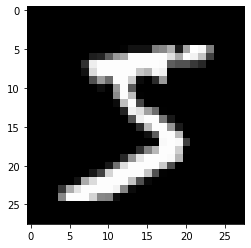

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.gray)

In [4]:
# 3-1. 이미지 데이터 전처리 : 2차원->1차원 🌟🌟🌟
X_train_1d = X_train.reshape(60000,784)
# X_train = X_train.reshape(-1,28*28)
# X_train = X_train.reshape(60000,-1)
X_test_1d = X_test.reshape(10000,784)

In [5]:
X_train[0].shape
# Dense 레이어에 인풋으로 사용할 수 없음

(28, 28)

In [6]:
# 3-2. 이미지 데이터 전처리 : Normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_1d)
X_train_scale = scaler.transform(X_train_1d)
X_test_scale = scaler.transform(X_test_1d)

#X_train = X_train/255
#X_test = X_test/255

In [7]:
X_train_scale[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
X_train_scale.shape

(60000, 784)

In [9]:
y_train[0:60000]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# 4. Label 전처리 (one-hot encoding) 
# 컬럼 1개일 때는 getdummies나 to categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder()), [0:]],
#                      remainder='passThrough')


In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
# 5. 모델 생성 : MLP
from tensorflow import keras
from tensorflow.keras import models, layers
from keras.layers import Dense, Activation, Dropout

model = models.Sequential()
model.add(Dense(input_dim = X_train_scale.shape[1], units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = y_train.shape[1], activation = 'softmax'))

In [13]:
# 6. Compile - Optimizer, Loss function 설정

model.compile(loss = 'categorical_crossentropy',
             optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 7. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train_scale, y_train, batch_size=32, epochs=1000, 
                    validation_split=0.2, verbose=2, callbacks=[early_stopping])

Epoch 1/1000
1500/1500 - 3s - loss: 0.2581 - acc: 0.9225 - val_loss: 0.1599 - val_acc: 0.9523
Epoch 2/1000
1500/1500 - 2s - loss: 0.1088 - acc: 0.9662 - val_loss: 0.1470 - val_acc: 0.9549
Epoch 3/1000
1500/1500 - 2s - loss: 0.0769 - acc: 0.9761 - val_loss: 0.1058 - val_acc: 0.9681
Epoch 4/1000
1500/1500 - 2s - loss: 0.0609 - acc: 0.9809 - val_loss: 0.0906 - val_acc: 0.9718
Epoch 5/1000
1500/1500 - 2s - loss: 0.0475 - acc: 0.9849 - val_loss: 0.1049 - val_acc: 0.9728
Epoch 6/1000
1500/1500 - 2s - loss: 0.0392 - acc: 0.9877 - val_loss: 0.1022 - val_acc: 0.9723
Epoch 7/1000
1500/1500 - 2s - loss: 0.0317 - acc: 0.9898 - val_loss: 0.1284 - val_acc: 0.9682
Epoch 8/1000
1500/1500 - 2s - loss: 0.0300 - acc: 0.9900 - val_loss: 0.1111 - val_acc: 0.9737
Epoch 9/1000
1500/1500 - 2s - loss: 0.0275 - acc: 0.9910 - val_loss: 0.1204 - val_acc: 0.9733


In [15]:
# 8. 모델 평가하기
loss, acc = model.evaluate(X_test_scale, y_test, batch_size=30)  # 학습 완료 후 검증
print("손실률:", loss)  
print("정확도:", acc)  

334/334 [==============================] - 1s 1ms/step - loss: 0.1035 - acc: 0.9749
손실률: 0.10351594537496567
정확도: 0.9749000072479248


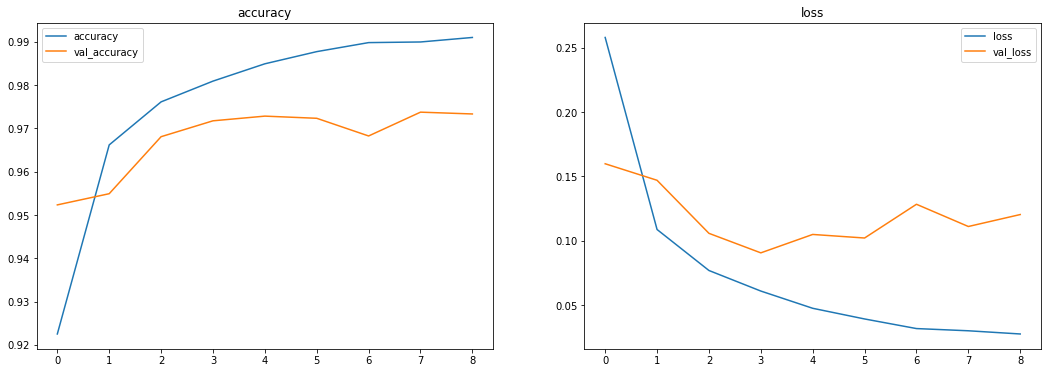

In [16]:
# 9. 학습 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")

plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")

plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [17]:
import warnings
warnings.filterwarnings("ignore")

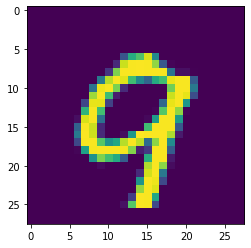

real: 9
predict: 9


In [18]:
# 10. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
import random
from random import randint

rand_num = randint(0,10000)
plt.imshow(X_test[rand_num])  # 데이터 일자로 펴주기
plt.show()

pred = model.predict_classes(X_test_scale)[rand_num]  # 다중분류이므로, predict_classes

print("real:", y_test[rand_num].argmax())
print("predict:", pred) 